In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("bright")

### Tratamento do dataset
[Our World in data - Internet](https://ourworldindata.org/internet)

In [13]:
# Dataset com países, região e código (https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?resource=download)

df_paises = pd.read_csv('datasets/continents.csv')
df_paises.drop(columns=['name', 'alpha-2', 'country-code', 'iso_3166-2', 
							'region-code', 'intermediate-region', 'sub-region-code',
							'intermediate-region-code'], inplace=True)
df_paises.rename(columns={'region': 'continente', 'sub-region': 'região_antiga'}, 
							inplace=True)
regiao = []
for index, row in df_paises.iterrows():
	if row[1] == 'Americas':
		regiao.append(row[2])
	else:
		regiao.append(row[1])
df_paises['região']	= regiao
df_paises.drop(columns=['região_antiga'], inplace=True)

# Dataset só com os países selecionados.
df_selecionados = pd.read_csv("dataset_selecionados.csv")

In [14]:
df_selecionados

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,CHN,China,"1,425,873,641",1,36.0,0.52,0.30,1.21,"1,010,740,000",2425.471293,43.10,54.30,116,East Asia & Pacific,Upper middle income
1,IND,India,"1,418,914,739",2,58.0,0.68,0.05,2.73,"833,710,000",786.700098,29.54,34.45,145,South Asia,Lower middle income
2,USA,United States,"338,573,477",3,45.0,3.33,1.00,30.00,"312,320,000",37491.179520,81.70,75.23,68,North America,High income
3,IDN,Indonesia,"275,818,905",4,53.0,0.42,0.17,2.94,"196,000,000",1143.831514,51.46,32.29,150,East Asia & Pacific,Lower middle income
4,PAK,Pakistan,"236,650,690",5,60.0,0.59,0.06,8.59,"118,800,000",668.547943,36.16,30.68,184,South Asia,Lower middle income
5,NGA,Nigeria,"219,478,772",6,60.0,0.88,0.03,5.25,"136,203,231",544.599477,48.36,27.51,161,Sub-Saharan Africa,Lower middle income
6,BRA,Brazil,"215,488,926",7,58.0,0.92,0.18,2.72,"160,010,801",4699.411262,85.58,67.47,83,Latin America & Caribbean,Upper middle income
7,BGD,Bangladesh,"171,505,314",8,60.0,0.34,0.11,2.22,"129,180,000",558.062877,27.14,18.02,180,South Asia,Lower middle income
8,MEX,Mexico,"127,676,342",10,45.0,3.62,1.20,12.06,"92,010,000",6105.280743,77.20,63.85,92,Latin America & Caribbean,Upper middle income
9,JPN,Japan,"123,834,522",11,35.0,3.38,0.88,45.53,"117,400,000",39309.478860,66.48,90.87,23,East Asia & Pacific,High income


### Porcentagem de usuários de internet

Países do hemisfério norte apresentaram um salto e lideraram o acesso a internet, com destaque para Reino Unido, Japão e Estados Unidos, os três países com maior porcentagem de acesso atualmente, com 94%, 90% e 75% de acesso respectivamente. Países de regiões emergentes tiveram um crescimento constante ao longo do tempo, enquanto o continente africano, embora apresente crescimento, ainda o faz de maneira muito tímida.

#### Continentes

In [15]:
df_paises.shape

(249, 3)

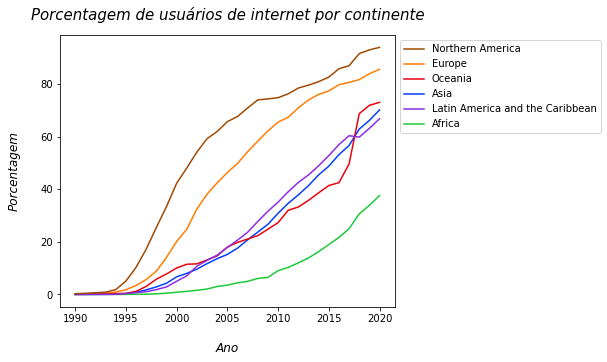

In [16]:
# Formatação
fig, ax = plt.subplots(figsize = (6,5))
# plt.xticks(fontsize = 13)
# plt.yticks(fontsize = 13)
# sns.despine(left=True)

df_acesso = pd.read_csv("datasets/share-of-individuals-using-the-internet.csv")

# renomear colunas
df_acesso.rename(columns={"Entity": "país", "Code": "cod", "Year": "ano","Individuals using the Internet (% of population)": "porcentagem"}, inplace=True)

# adiciona a coluna região do df paises.
df_acesso = df_acesso.merge(df_paises, left_on='cod', 
							right_on='alpha-3').drop(columns='alpha-3')

# Gráfico 
sns.lineplot(data=df_acesso, x='ano', y='porcentagem',
					hue='região', ci=None)
ax.set_title('Porcentagem de usuários de internet por continente', fontsize = "15", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Ano', fontsize = "12", style = 'italic', labelpad = 18)
ax.set_ylabel('Porcentagem', fontsize = "12", style = "italic", labelpad = 20)


# Mudar ordem da legenda 
order = [5, 1, 3, 0, 4, 2]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Mover legenda
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.savefig(r"static\img\usuarios_continente.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Países

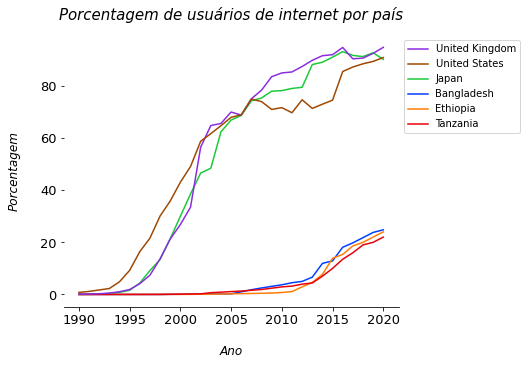

In [17]:
# Formatação
fig, ax = plt.subplots(figsize = (6,5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left=True)

df_acesso = pd.read_csv("datasets/share-of-individuals-using-the-internet.csv")

# renomear colunas
df_acesso.rename(columns={"Entity": "país", "Code": "cod", "Year": "ano", 
							"Individuals using the Internet (% of population)": 
							"porcentagem"}, inplace=True)

# adiciona a coluna região do df paises.
df_acesso = df_acesso.merge(df_selecionados, left_on='cod', 
							right_on='abreviacao').drop(columns='abreviacao')

# Cria df com paises nos extremos e maior e menor.
df_head = df_acesso[df_acesso.ano == 2020].sort_values(by='porcentagem').head(3)
df_tail = df_acesso[df_acesso.ano == 2020].sort_values(by='porcentagem').tail(3)
df_extremos = pd.concat([df_head, df_tail], ignore_index=True)

pais_lst = list(df_extremos['país'])

# remove todos os países que não estejam na lista de extremos.
for index, rows in df_acesso.iterrows():
	if df_acesso['país'][index] not in pais_lst:
		df_acesso.drop(index, inplace=True)

# Reseta os index
df_acesso.reset_index(inplace=True, drop=True)

# Gráfico 
plot = sns.lineplot(data=df_acesso, x='ano', y='porcentagem',
					hue='país', ci=None)
ax.set_title('Porcentagem de usuários de internet por país', fontsize = "15", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Ano', fontsize = "12", style = 'italic', labelpad = 18)
ax.set_ylabel('Porcentagem', fontsize = "12", style = "italic", labelpad = 20)

# Mudar ordem da legenda 
order = [4, 5, 2, 0, 1, 3]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Mover legenda
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [18]:
df_tail

,país,cod,ano,porcentagem,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
308,Japan,JPN,2020,90.219460,Japan,"123,834,522",11,35.0,3.38,0.88,45.53,"117,400,000",39309.47886,66.48,90.87,23,East Asia & Pacific,High income
586,United States,USA,2020,90.900002,United States,"338,573,477",3,45.0,3.33,1.00,30.00,"312,320,000",37491.17952,81.70,75.23,68,North America,High income
555,United Kingdom,GBR,2020,94.818199,United Kingdom,"67,550,090",21,60.0,1.42,0.11,71.29,"65,001,016",28033.48928,89.94,94.62,18,Europe & Central Asia,High income


### Planos telefônicos

Os dados de pessoas com celulares são um pouco mais igualitários. Os celulares começaram a se popularizar a partir dos anos 2000 e hoje regiões como Ásia e América Latina possuem mais celulares do que a América do Norte, onde o crescimento aconteceu mais rapidamente no início. O país com o maior número de celulares é a Tailândia, com 1,6 celular por pessoa; enquanto na Etiópia, a cada 100 pessoas, apenas 38 possuem um dispositivo móvel.

#### Continentes

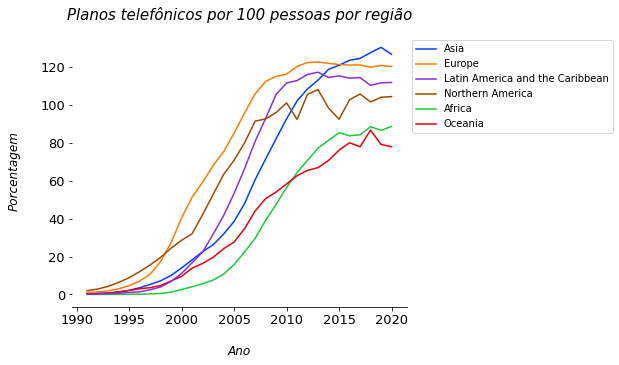

In [19]:
fig, ax = plt.subplots(figsize = (6,5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left=True)

# Assinaturas de plano telefônico
df_celular = pd.read_csv('datasets/mobile.csv')
df_celular.rename(columns={'Entity': 'país', 'Code': 'cod', 'Year': 'ano', 
							'Mobile cellular subscriptions (per 100 people)': 
							'porcentagem'}, inplace=True)
df_celular = df_celular[df_celular['ano'] > 1990]

# adiciona a coluna região do df paises.
df_celular = df_celular.merge(df_paises, left_on='cod', 
								right_on='alpha-3').drop(columns='alpha-3')

# Gráfico
plot = sns.lineplot(data=df_celular, x='ano', y='porcentagem',
					hue='região', ci=None)
ax.set_title('Planos telefônicos por 100 pessoas por região', fontsize = "15", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Ano', fontsize = "12", style = 'italic', labelpad = 18)
ax.set_ylabel('Porcentagem', fontsize = "12", style = "italic", labelpad = 20)

# Mudar ordem da legenda 
order = [0, 1, 4, 5, 2, 3]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Mover legenda
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.savefig(r"static\img\telefone_regiao.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Países


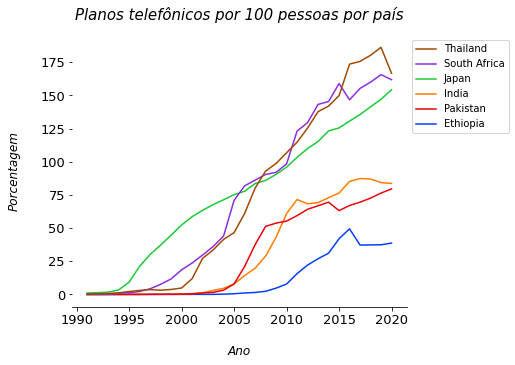

In [22]:
fig, ax = plt.subplots(figsize = (6,5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left=True)

# Assinaturas de plano telefônico
df_celular = pd.read_csv('datasets/mobile.csv')
df_celular.rename(columns={'Entity': 'país', 'Code': 'cod', 'Year': 'ano', 
							'Mobile cellular subscriptions (per 100 people)': 
							'porcentagem'}, inplace=True)
df_celular = df_celular[df_celular['ano'] > 1990]

# adiciona a coluna região do df paises.
df_celular = df_celular.merge(df_selecionados, left_on='cod', 
								right_on='abreviacao').drop(columns=['abreviacao'])

# Cria df com paises nos extremos e maior e menor.
df_head = df_celular[df_celular.ano == 2020].sort_values(by='porcentagem').head(3)
df_tail = df_celular[df_celular.ano == 2020].sort_values(by='porcentagem').tail(3)
df_extremos = pd.concat([df_head, df_tail], ignore_index=True)

pais_lst = list(df_extremos['país'])

# remove todos os países que não estejam na lista de extremos.
for index, rows in df_celular.iterrows():
	if df_celular['país'][index] not in pais_lst:
		df_celular.drop(index, inplace=True)

# Reseta os index
df_celular.reset_index(inplace=True, drop=True)

# # Gráfico
plot = sns.lineplot(data=df_celular, x='ano', y='porcentagem',
					hue='país', ci=None)
ax.set_title('Planos telefônicos por 100 pessoas por país', fontsize = "15", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Ano', fontsize = "12", style = 'italic', labelpad = 18)
ax.set_ylabel('Porcentagem', fontsize = "12", style = "italic", labelpad = 20)

# Mudar ordem da legenda 
order = [5, 4, 2, 1, 3, 0]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Mover legenda
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.savefig(r"static\img\telefone_pais.png", dpi=300, facecolor='white', bbox_inches='tight')

### Redes sociais

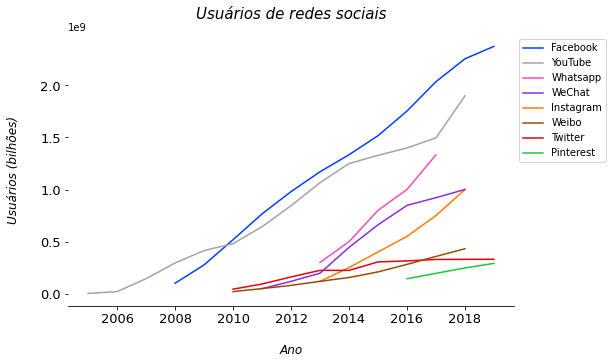

In [21]:
fig, ax = plt.subplots(figsize = (8,5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left=True)

# Usuários de redes sociais
df_redes = pd.read_csv('datasets/social_media.csv')
df_redes.drop(columns={'Code'}, inplace=True)
df_redes.rename(columns={'Entity': 'rede', 'Year': 'ano', 
							'Monthly active users (Statista and TNW (2019))': 
							'usuários'}, inplace=True)

# Seleciona algumas redes
for index, row in df_redes.iterrows():
	if row[0] != 'Facebook' and \
		row[0] != 'Whatsapp' and \
		row[0] != 'Instagram' and \
		row[0] != 'YouTube' and \
		row[0] != 'Twitter' and \
		row[0] != 'WeChat' and \
		row[0] != 'Weibo' and \
		row[0] != 'Pinterest':
		df_redes = df_redes.drop(index)
		
# Gráfico
plot = sns.lineplot(data=df_redes, x='ano', y='usuários',
					hue='rede', ci=None)
ax.set_title('Usuários de redes sociais', fontsize = "15", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Ano', fontsize = "12", style = 'italic', labelpad = 18)
ax.set_ylabel('Usuários (bilhões)', fontsize = "12", style = "italic", labelpad = 20)

# Mudar ordem da legenda 
order = [0, 7, 6, 4, 1, 5, 3, 2]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Mover legenda
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
